<a href="https://colab.research.google.com/github/alen8807/Ybigta_assignment/blob/main/Hugging_Face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **과제 1번: CV모델 불러오기 + 실행**

In [1]:
!pip install transformers
from transformers import pipeline

In [2]:
!pip install timm
import timm

In [9]:
from PIL import Image
import matplotlib.pyplot as plt

## **DETR (End-to-End Object Detection) model**

In [3]:
DETR_model = pipeline("object-detection", "facebook/detr-resnet-101-dc5")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/179M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/detr-resnet-101-dc5 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


preprocessor_config.json:   0%|          | 0.00/274 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


1. 간단한 고양이 사진

In [4]:
DETR_model("/content/hugging pic.jpg")

[{'score': 0.9975600242614746,
  'label': 'cat',
  'box': {'xmin': 670, 'ymin': 2169, 'xmax': 1616, 'ymax': 2787}}]

2. 조금 복잡한 고양이 사진

In [7]:
DETR_model("/content/hugging pic2.jpg")

[{'score': 0.9909994006156921,
  'label': 'cat',
  'box': {'xmin': 992, 'ymin': 1368, 'xmax': 1560, 'ymax': 1849}},
 {'score': 0.9667510390281677,
  'label': 'cat',
  'box': {'xmin': 1484, 'ymin': 2475, 'xmax': 1875, 'ymax': 3022}}]

## **YOLOS (tiny-sized) model**

In [5]:
yolos_model = pipeline("object-detection", "hustvl/yolos-tiny")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.13k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/26.0M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/275 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


1. 간단한 고양이 사진

In [6]:
yolos_model("/content/hugging pic.jpg")

[{'score': 0.9991357922554016,
  'label': 'cat',
  'box': {'xmin': 676, 'ymin': 2235, 'xmax': 1634, 'ymax': 2832}}]

2. 조금 복잡한 고양이 사진

In [8]:
yolos_model("/content/hugging pic2.jpg")

[{'score': 0.9949139356613159,
  'label': 'cat',
  'box': {'xmin': 998, 'ymin': 1371, 'xmax': 1564, 'ymax': 1906}},
 {'score': 0.9510771632194519,
  'label': 'bird',
  'box': {'xmin': 1496, 'ymin': 2690, 'xmax': 1895, 'ymax': 3064}}]

DETR 모델과 YOLOS 모델을 비교해보았을때, **고양이 한마리가 풀에 앉아있는 비교적 간단한 사진은 경우**, 둘 다 고양이를 제대로 탐지하였으며, score도 약 0.99의 값으로 동일함을 볼 수 있었다. 반면, **풀 사이에 두마리의 고양이가 앉아있는, 비교적 복잡한 사진**의 경우 DETR 모델은 정확히 두 객체를 고양이로 판별하였으나, YOLOS 모델의 경우 두마리의 고양이 중 한마리를 '새'로 잘못 판별한 것을 확인할 수 있었다.

**1. 간단한 고양이 사진**

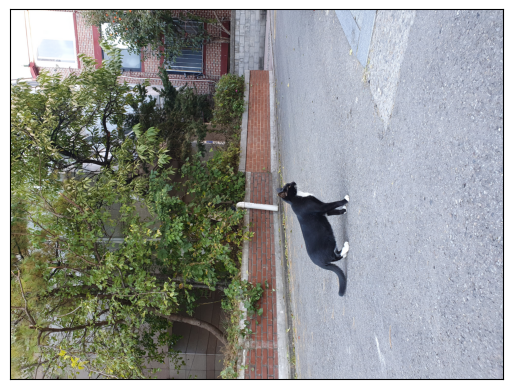

In [10]:
frm = plt.gca()

img = Image.open("/content/hugging pic.jpg")
frm.imshow(img)

frm.axes.get_xaxis().set_visible(False)
frm.axes.get_yaxis().set_visible(False)

**2. 조금 복잡한 고양이 사진**

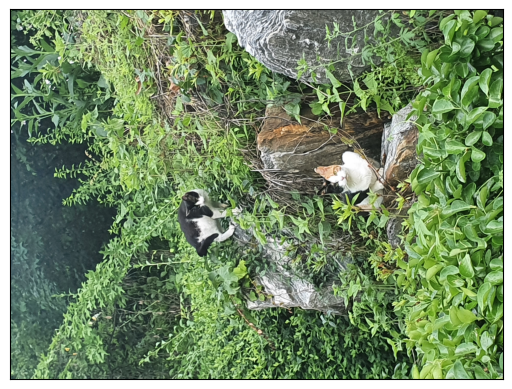

In [11]:
frm = plt.gca()

img = Image.open("/content/hugging pic2.jpg")
frm.imshow(img)

frm.axes.get_xaxis().set_visible(False)
frm.axes.get_yaxis().set_visible(False)